# 🔧 Sale Prediction

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ➡️ Upload the data

In [2]:
data=pd.read_csv("C:/Users/LENOVO/Desktop/Project/Intership\Data/advertising.csv")
# Check first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check data info (datatypes, etc.)
print(data.info())
# To know the data describe 
data.describe()

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 📊 Exploratory Data Analysis (EDA)

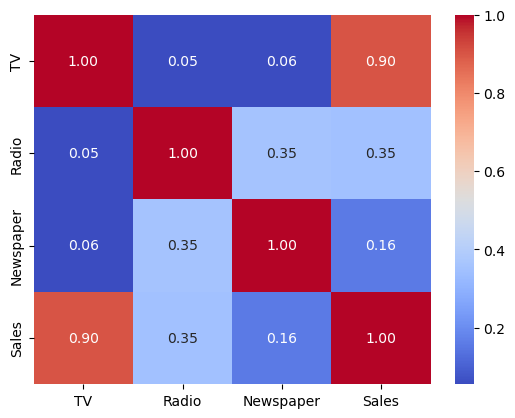

In [3]:
# Correlation matrix to see relationship between variables
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


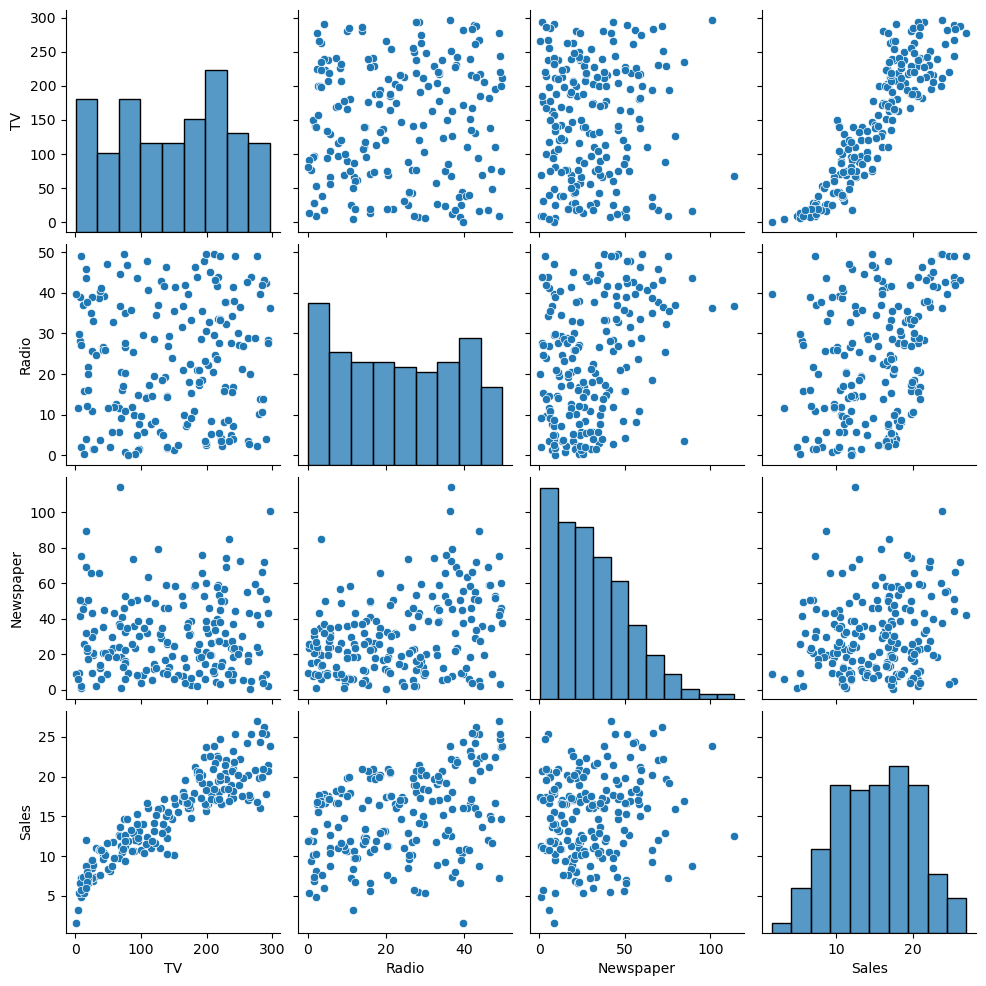

In [4]:
# Plotting the relationship between ad spends and sales
sns.pairplot(data)
plt.show()


# 📊 Sales Prediction Using Linear Regression

In [5]:
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')



Mean Absolute Error: 1.274826210954934
Mean Squared Error: 2.907756910271091
Root Mean Squared Error: 1.7052146229349228
R2 Score: 0.9059011844150826


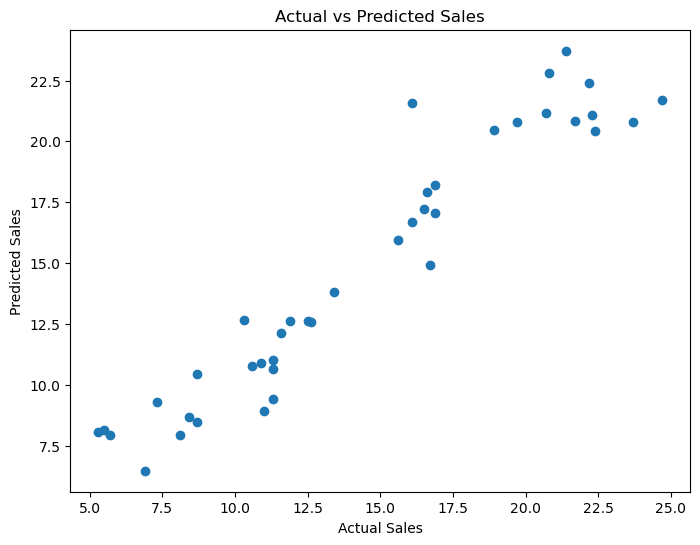

In [6]:
# Plotting the actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


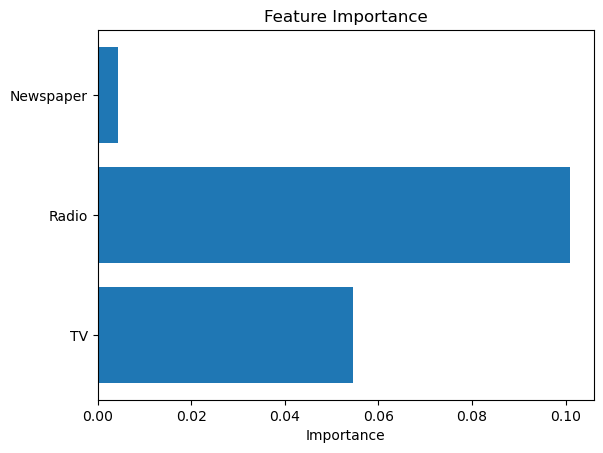

In [7]:
# Plotting feature importance
feature_importance = model.coef_
features = ['TV', 'Radio', 'Newspaper']

plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


# 💾 Saving and Labeling Model Predictions for Actual & Predicted value

In [10]:
import os

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred
})
# Define directory and file path
directory = r'C:\Users\LENOVO\Desktop\Project\Sales_Prediction'
file_path = os.path.join(directory, 'sales_prediction_results.csv')

# Check if directory exists, create if not
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to CSV
results_df.to_csv(file_path, index=False)

# Print confirmation message
print(f"Predicted and actual sales saved successfully to '{file_path}'")

Predicted and actual sales saved successfully to 'C:\Users\LENOVO\Desktop\Project\Sales_Prediction\sales_prediction_results.csv'
